## Importing Libraries and data

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import glob
import zipfile
import os
import shutil
import re

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
path = r'/content/drive/MyDrive/BBCNewsAnalysis/BBCNewsAnalysisTest-main.zip'

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [53]:
ls

BBCNewsAnalysisTest-main/  drive/  sample_data/


In [54]:
def read_file_with_fallback_encoding(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            return f.read()
    except UnicodeDecodeError:
        with open(file_path, 'r', encoding='latin-1') as f:
            return f.read()

In [55]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    return phrase

In [56]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'

def stopwords_list():

    stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

    return stopwords

In [57]:
data_paths = glob.glob('BBCNewsAnalysisTest-main/*/*.txt')

data = []
for data_path in data_paths:
    category = data_path.split('/')[1]
    text = read_file_with_fallback_encoding(data_path)
    data.append({'data_path': data_path,
                  'category': category,
                  'text': text})

df = pd.DataFrame(data)

df.head(3)

,data_path,category,text
0,BBCNewsAnalysisTest-main/politics/318.txt,politics,Labour in constituency race row\n\nLabour's ch...
1,BBCNewsAnalysisTest-main/politics/078.txt,politics,Asylum children to face returns\n\nThe UK gove...
2,BBCNewsAnalysisTest-main/politics/154.txt,politics,Mayor will not retract Nazi jibe\n\nLondon may...


In [58]:
df.shape

(2225, 3)

In [59]:
# data samples

for i in range(4):
    print(df.loc[i, 'text'], '-'*150)

Labour in constituency race row

Labour's choice of a white candidate for one of the UK's most multi-racial seats proves the need for all-black short lists, says a race group.

Local councillor Lyn Brown was selected for West Ham, east London, in a contest between two white and five ethnic minority women. An Operation Black Vote spokesman said they now wanted to meet Labour party chairman Ian McCartney for discussions. Mr McCartney recently announced party consultation on all-black shortlists. However, Labour has so far unable been unable to comment on the implications of the West Ham result.

Ashok Vishwanathan of Operation Black Vote, which aims to increase ethnic minorities' participation in the political process and their representation, said the result again showed all-women shortlists were not effective in getting minority women selected. "I think all-black shortlists are the only way to cut to the chase and address the lack of minority candidates," Mr Vishwanathan said.

Last mo

In [60]:
def preprocess_text(text):

    text = text.replace('\n', ' ')
    text = decontracted(text)
    text = re.sub(r'[^A-Za-z0-9\.]+', ' ', text)
    text = text.lower()

    return text

In [61]:
df['clean_text'] = df['text'].apply(preprocess_text)

In [62]:
idx = 32
print("Original Text: \n", df.loc[idx, 'text'])

print('-'*150)

print("Clean Text: \n", df.loc[idx, 'clean_text'])

Original Text: 
 Report attacks defence spending

The Ministry of Defence has been criticised over the soaring spending costs and growing delays of its top equipment projects.

A National Audit Office report on the 20 biggest projects says costs have risen by £1.7bn in the past year. It says there is "little evidence" the MoD's performance had improved, despite the introduction of a "smart acquisition" policy six years ago. A senior defence official told the BBC lessons were being learned. The NAO's annual report showed the total cost of the 20 projects covered was expected to reach £50bn - 14% higher than originally planned. The total delays amounted to 62 months, with average individual delays rising by three months.

Sir John Bourn, head of the NAO, said the problems showed the principles of the scheme known as smart acquisition had not been consistently applied. "Many problems can be traced to the fact that the MoD has not spent enough time and resources in the assessment phase," t

In [63]:
df['clean_text_length'] = df['clean_text'].str.split().apply(len)

In [65]:
df.head()

,data_path,category,text,clean_text,clean_text_length
0,BBCNewsAnalysisTest-main/politics/318.txt,politics,Labour in constituency race row\n\nLabour's ch...,labour in constituency race row labour is choi...,304
1,BBCNewsAnalysisTest-main/politics/078.txt,politics,Asylum children to face returns\n\nThe UK gove...,asylum children to face returns the uk governm...,657
2,BBCNewsAnalysisTest-main/politics/154.txt,politics,Mayor will not retract Nazi jibe\n\nLondon may...,mayor will not retract nazi jibe london mayor ...,525
3,BBCNewsAnalysisTest-main/politics/231.txt,politics,Woolf murder sentence rethink\n\nPlans to give...,woolf murder sentence rethink plans to give mu...,403
4,BBCNewsAnalysisTest-main/politics/109.txt,politics,UK firms 'embracing e-commerce'\n\nUK firms ar...,uk firms embracing e commerce uk firms are emb...,312


In [64]:
df.to_csv('/content/drive/MyDrive/BBCNewsAnalysis/df_cleaned.csv')

<Axes: xlabel='clean_text_length', ylabel='Count'>

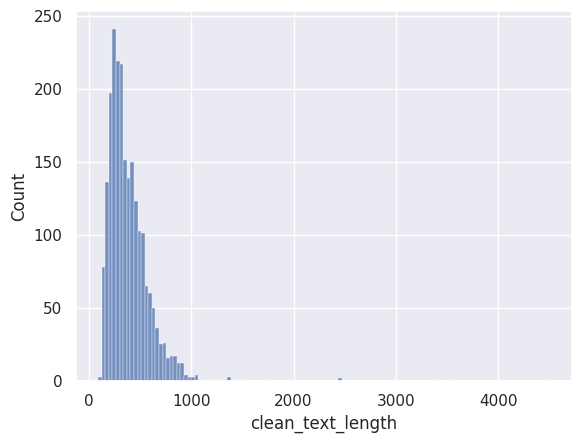

In [66]:
sns.histplot(df['clean_text_length'])

We can see that majority of texts are below 1000 words. So, lets truncate our length of text to 1024